In [1]:
from multicorner import mcorner
import corner as corner
import numpy as np

## Labels, Titles and Fonts

While we try to pick sensible defaults, one might wish to further customize these plots for use in presentations or publications. 

In [2]:
np.random.seed(42)

# Generate random covariance matrices with sigmas ~ 1
def random_covariance():
    A = np.random.rand(3, 3)
    cov = np.dot(A, A.T)  # Ensure it's positive semi-definite
    return cov 

In [3]:
mean1 = np.array([0,5,10])  # Random center
cov1 = random_covariance()

# Generate data, trimodal distribution
data1 = np.random.multivariate_normal(mean1, cov1, 5000)
data2 = np.random.multivariate_normal(mean1+100, cov1, 1000)
data3 = np.random.multivariate_normal(mean1+200, cov1, 1000)
data = np.vstack((data1, data2, data3))

## Titles

The plot has a total of 3 arguments to control titles. First, the diagonal title can (uniquely) be supplied with the argument 'percentile', to automatically compute the chosen percentile bounds of each distribution

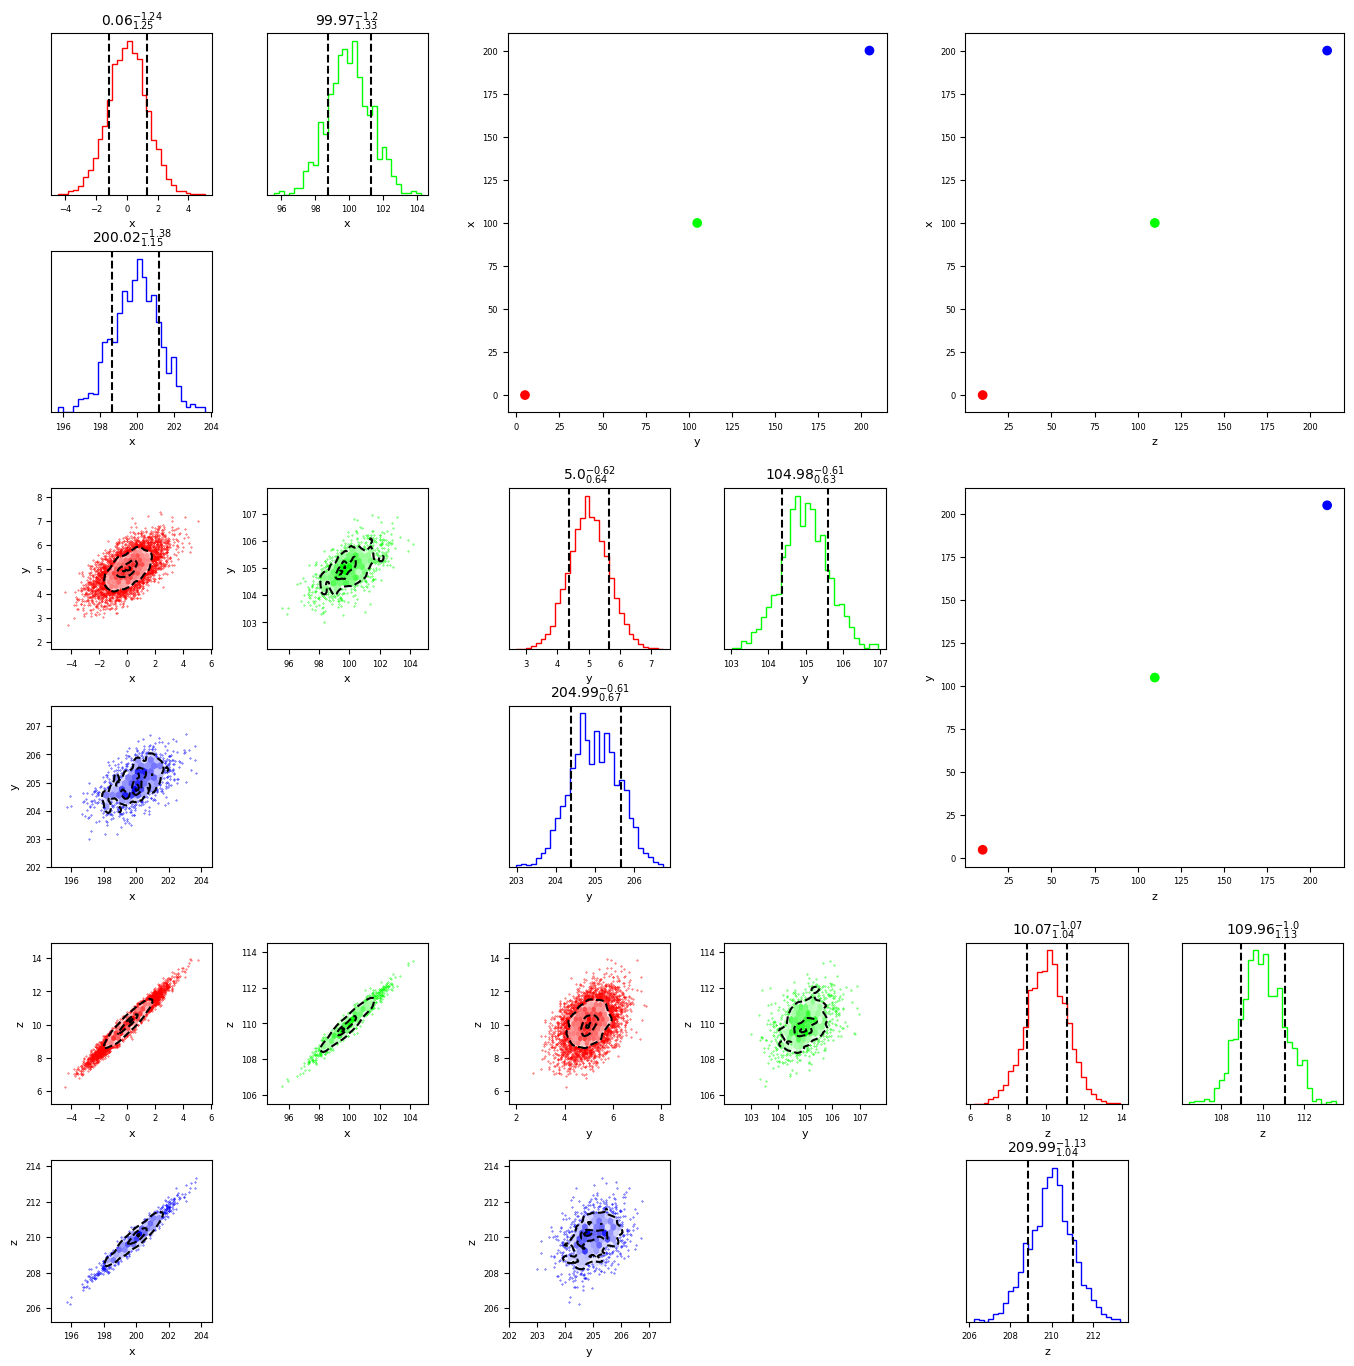

In [4]:
fig = mcorner(data,labels=['x','y','z'],percentiles=True,diag_title='percentile')

More generally, each title can be supplied with a callable function, which can be used to format each individual title according to user preferences

In [5]:
upper_title_func=lambda i,j: f"Orientation Plots ({i},{j})"
diag_title_func=lambda i,j,ii,jj: f"Histograms ({i},{j}) {ii},{jj}"
lower_title_func=lambda i,j,ii,jj: f"Scatter Plots ({i},{j}) {ii},{jj}"

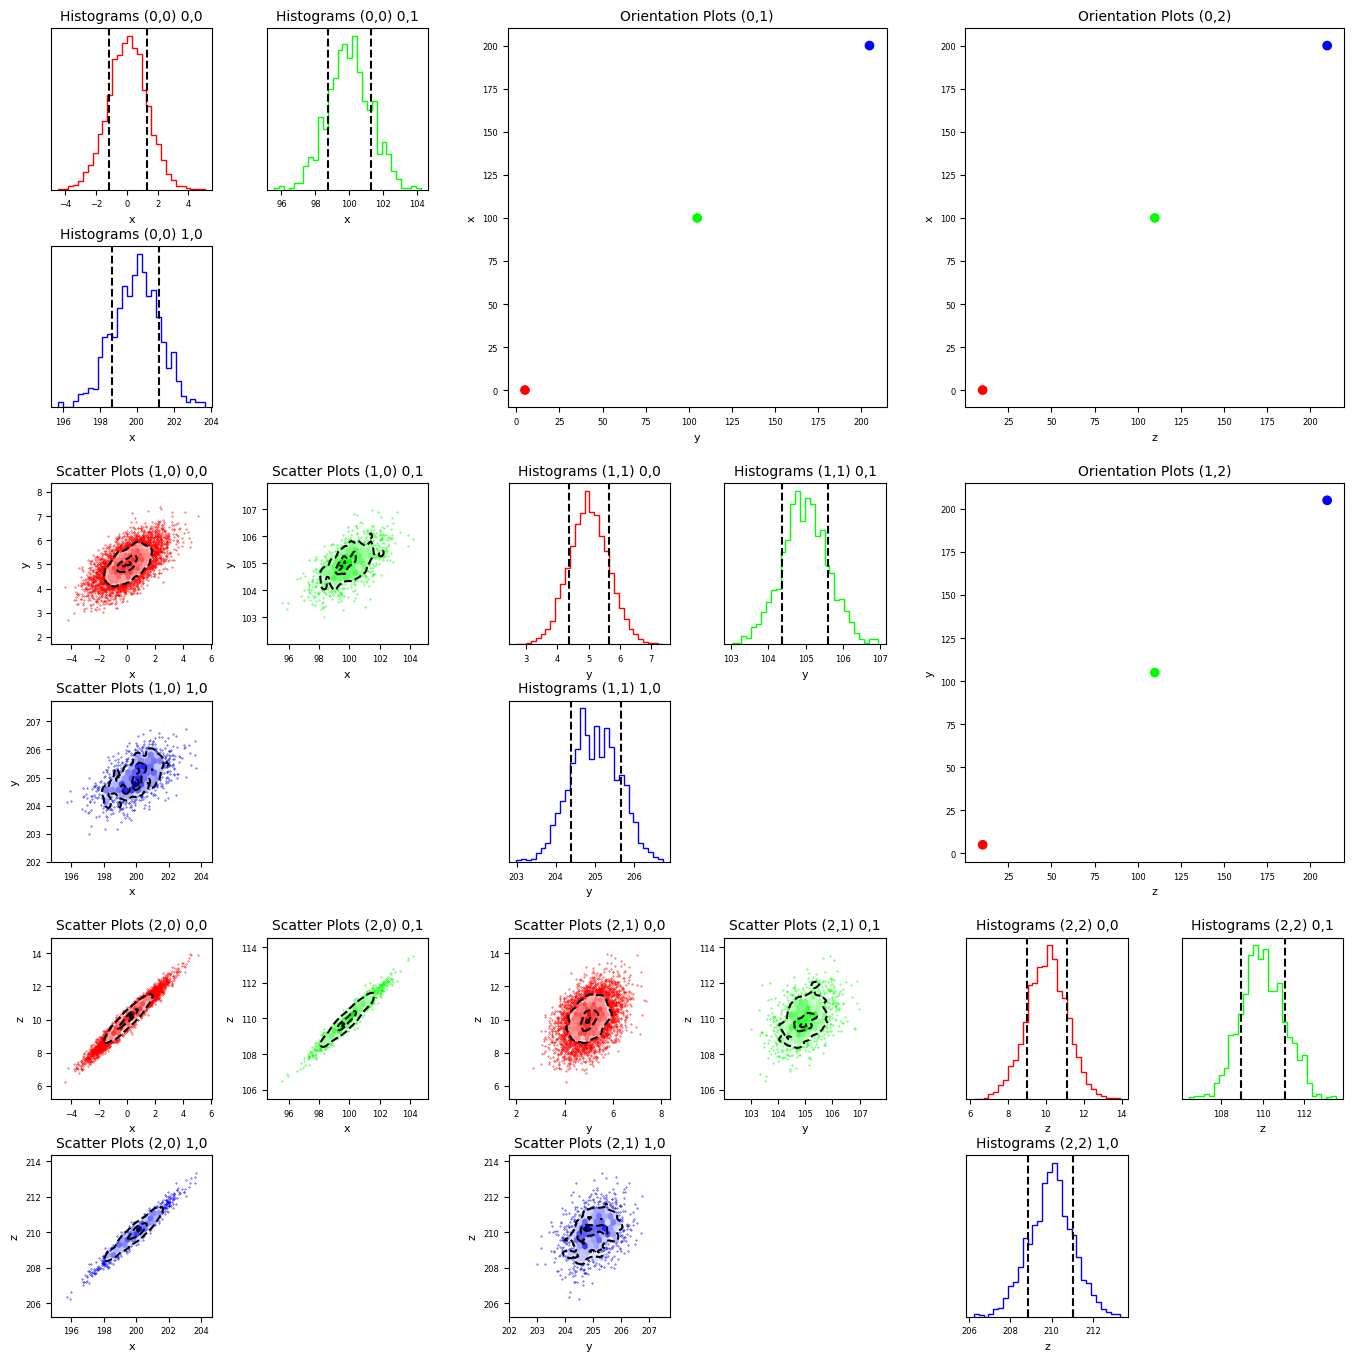

In [6]:
fig = mcorner(data,labels=['x','y','z'],percentiles=True,upper_title=upper_title_func,lower_title=lower_title_func,diag_title=diag_title_func)

The two arguments can be mixed-and-matched

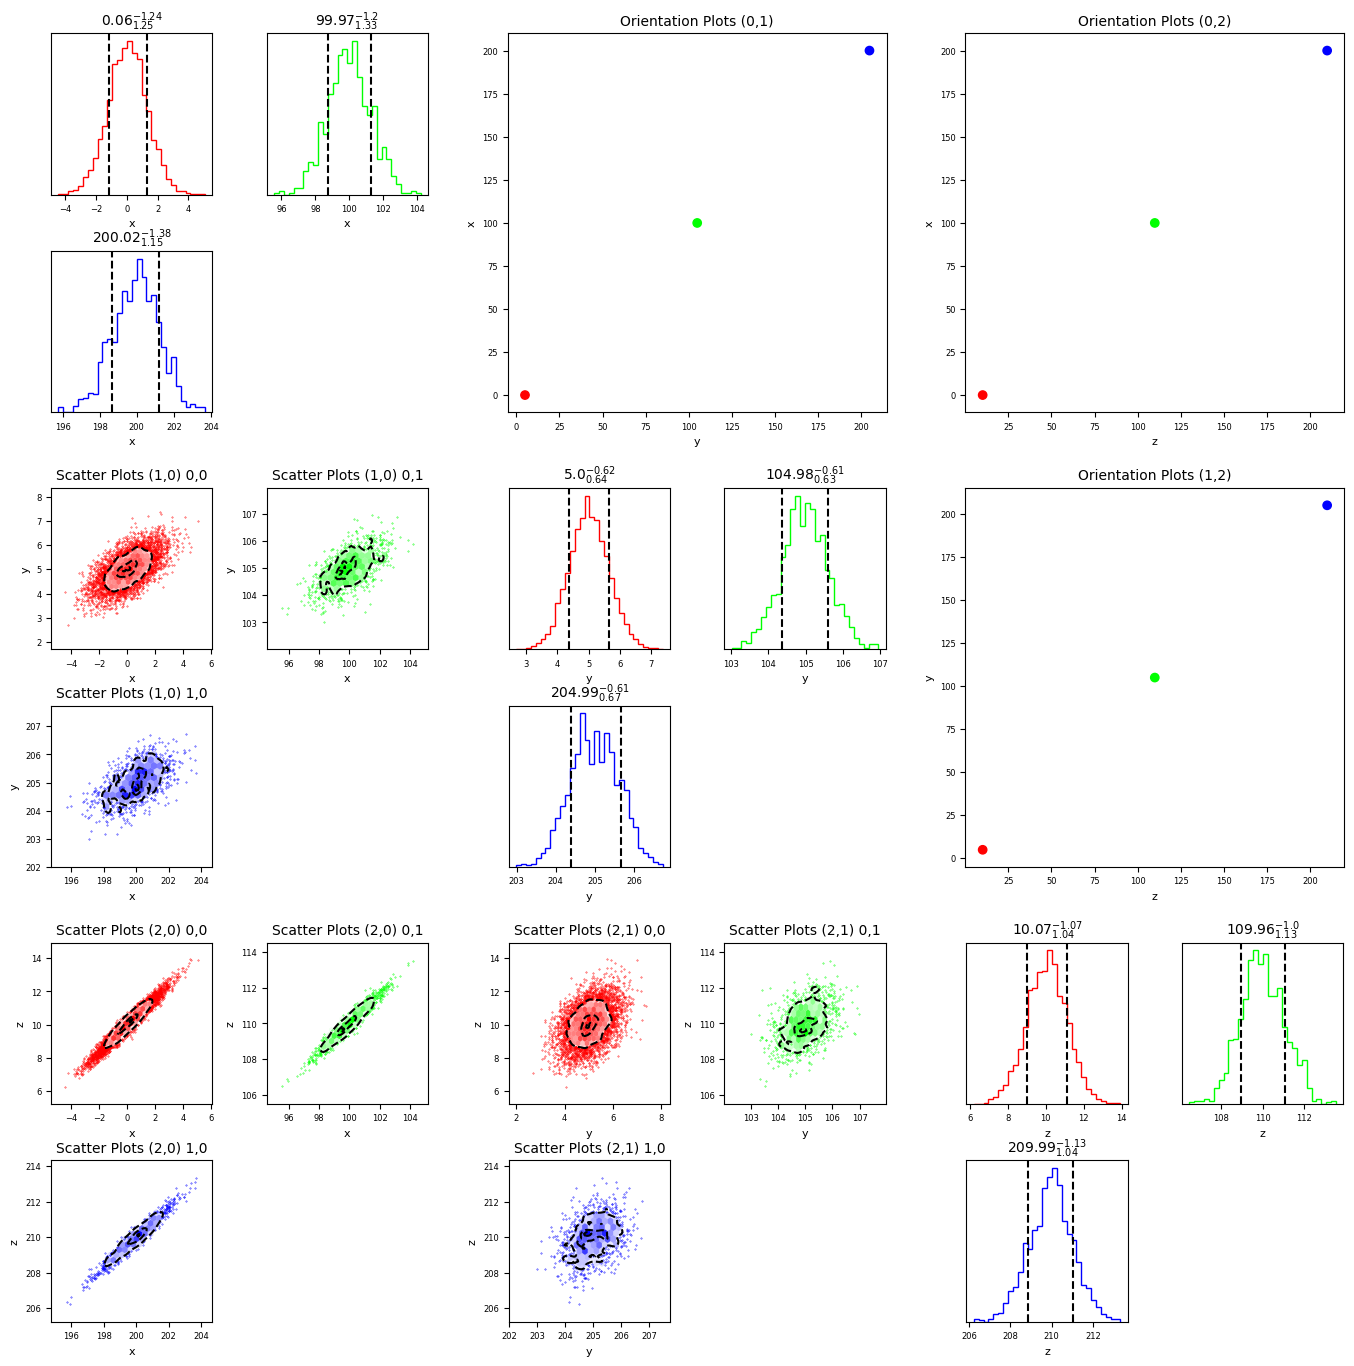

In [7]:
fig = mcorner(data,labels=['x','y','z'],percentiles=True,upper_title=upper_title_func,lower_title=lower_title_func,diag_title='percentile')

The size of the labels, titles, fonts and ticks can be controlled by passing the relevant arguments to the code

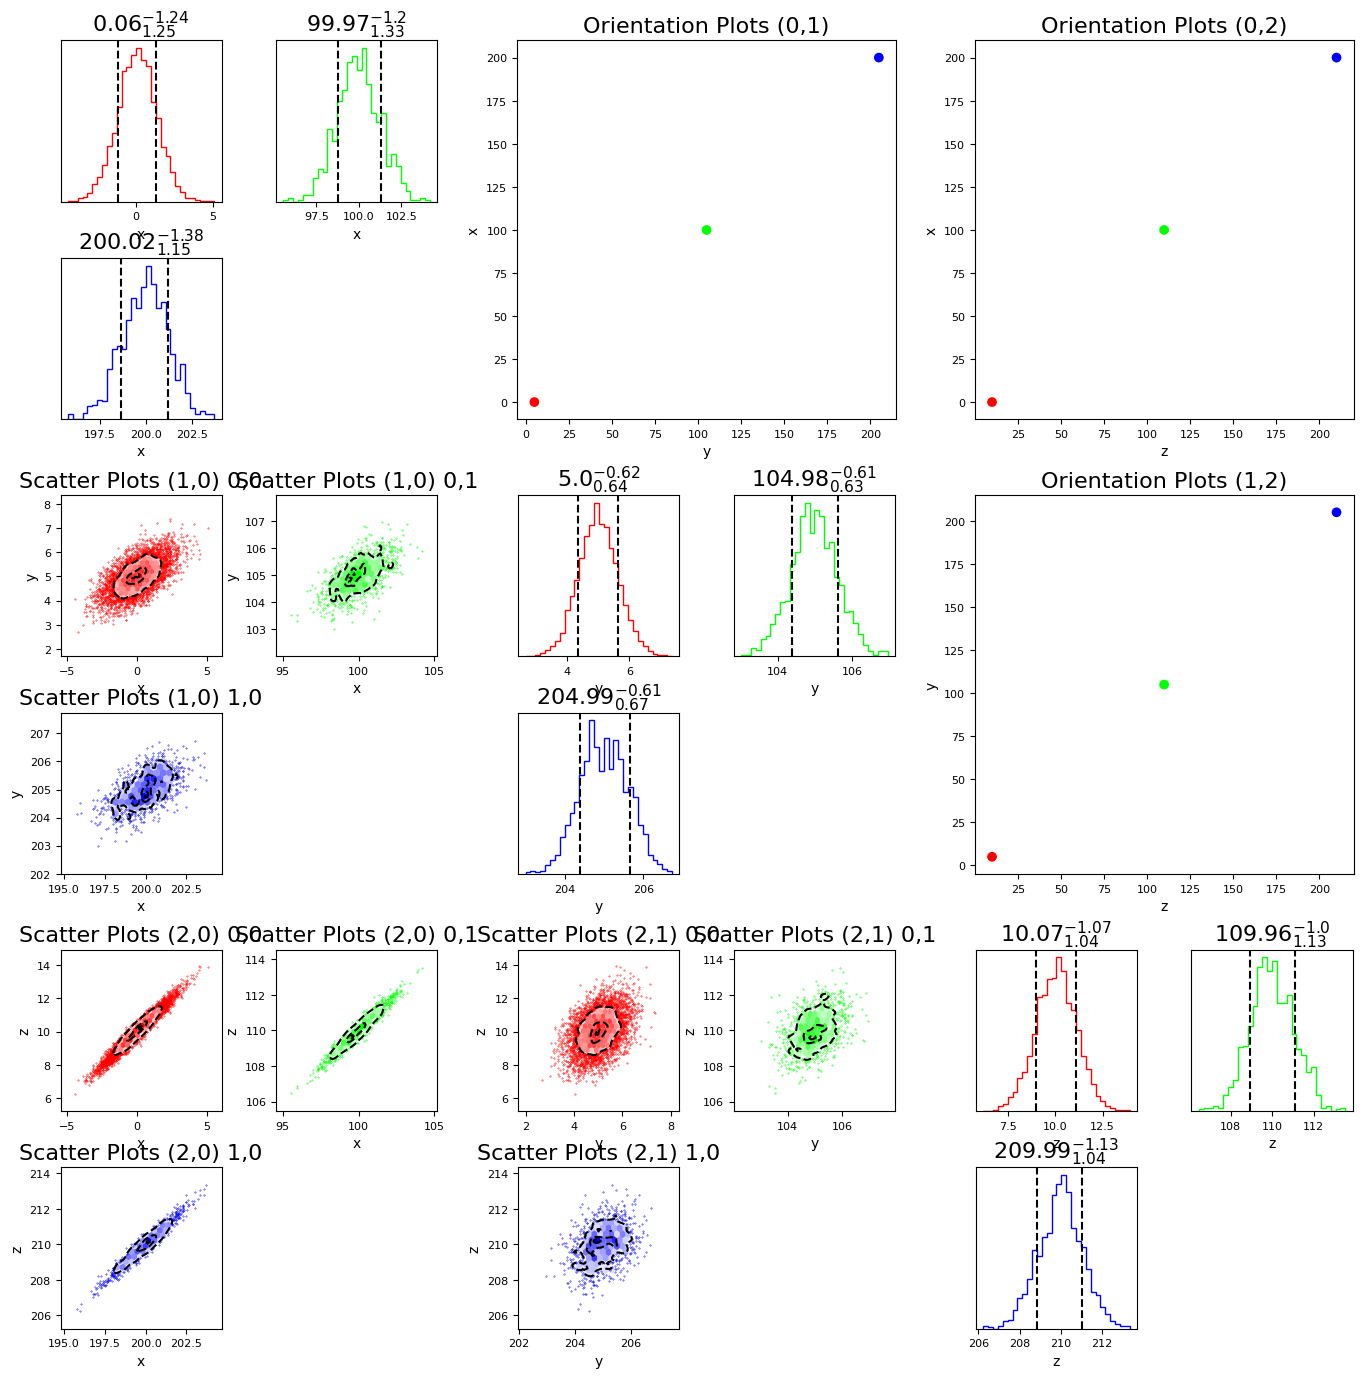

In [8]:
fig = mcorner(data,labels=['x','y','z'],percentiles=True,upper_title=upper_title_func,lower_title=lower_title_func,diag_title='percentile',
                                  titlesize=16,fontsize=8,labelsize=10,ticksize=8)

While we choose resonable defaults, some choices of fontsizes can lead to ugly overlap between labels and titles.  This can be managed by changing the inner/outer wspace/hspace arguments. Below, we increase the horizontal spacing between our 9 panels and increase the vertical spacing between our 3 subpanels. 

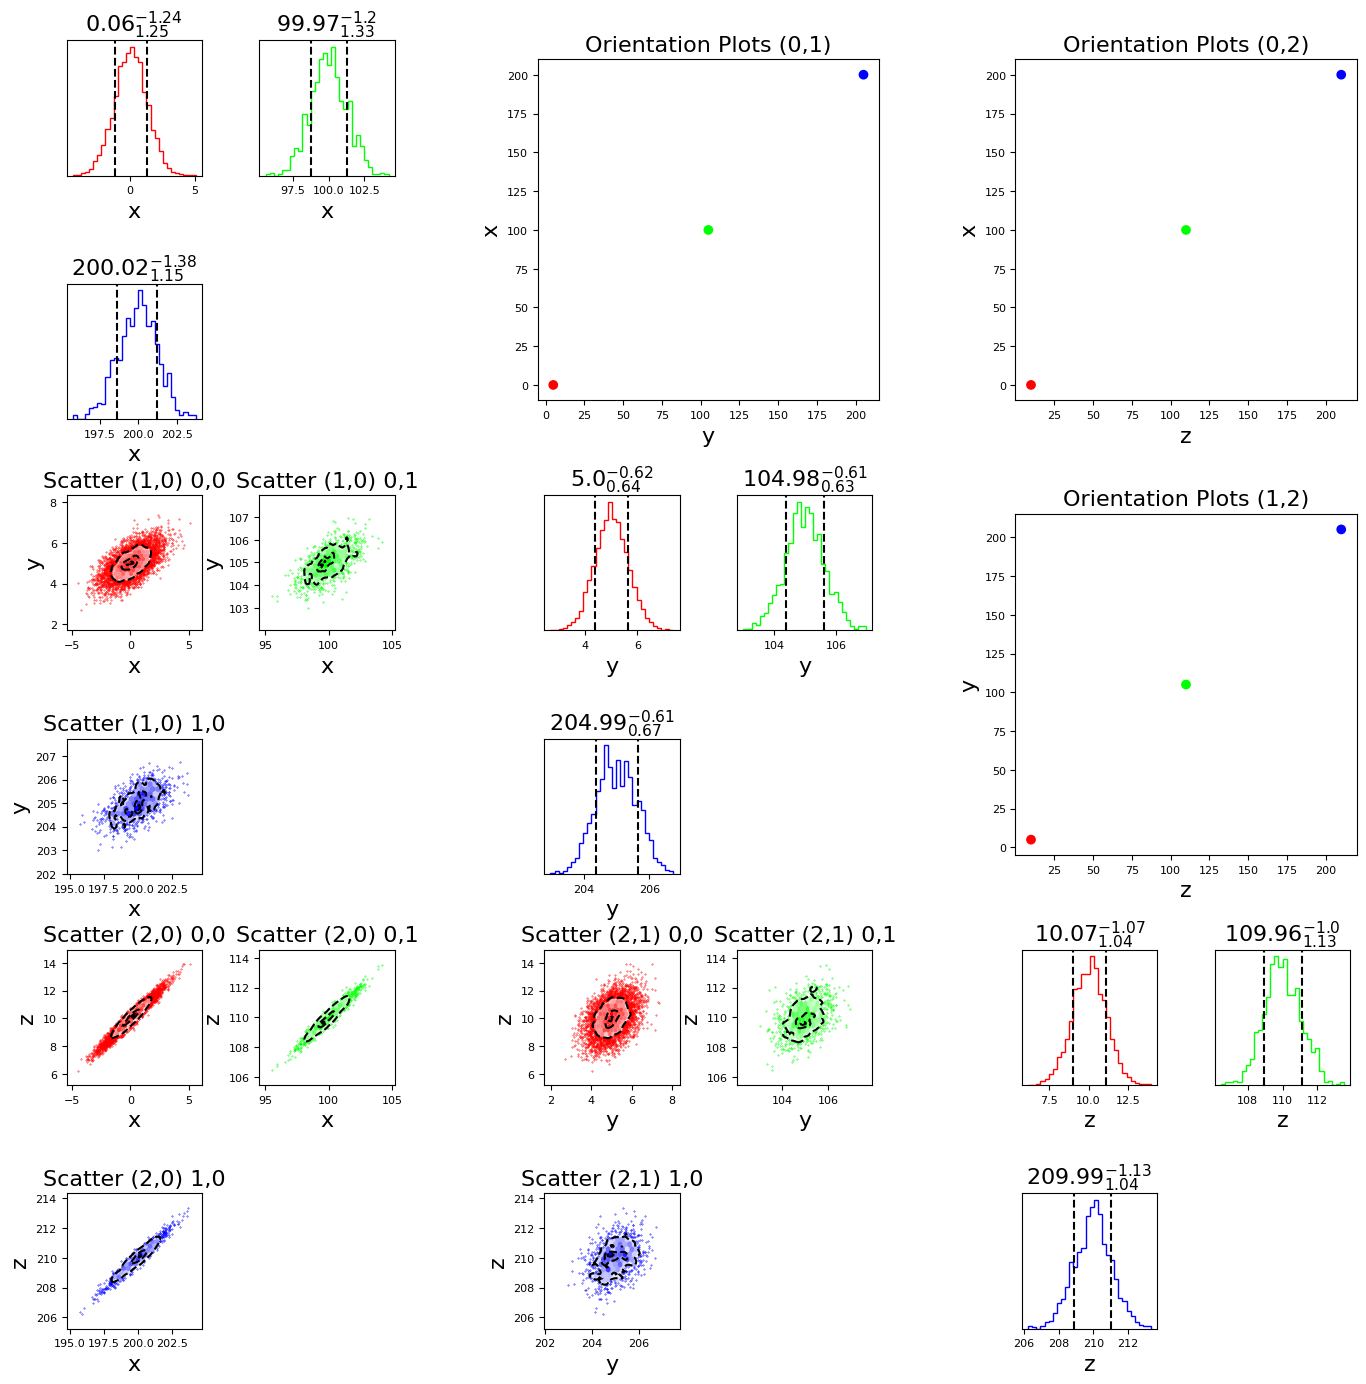

In [9]:
upper_title_func=lambda i,j: f"Orientation Plots ({i},{j})"
diag_title_func=lambda i,j,ii,jj: f"Histograms ({i},{j}) {ii},{jj}"
lower_title_func=lambda i,j,ii,jj: f"Scatter ({i},{j}) {ii},{jj}"

fig = mcorner(data,labels=['x','y','z'],percentiles=True,upper_title=upper_title_func,lower_title=lower_title_func,diag_title='percentile',
                                  titlesize=16,fontsize=8,labelsize=16,ticksize=8,outer_wspace=0.4,inner_hspace=0.8)

another approach would be to increase the size of the figure, which we can do with the figsize argument

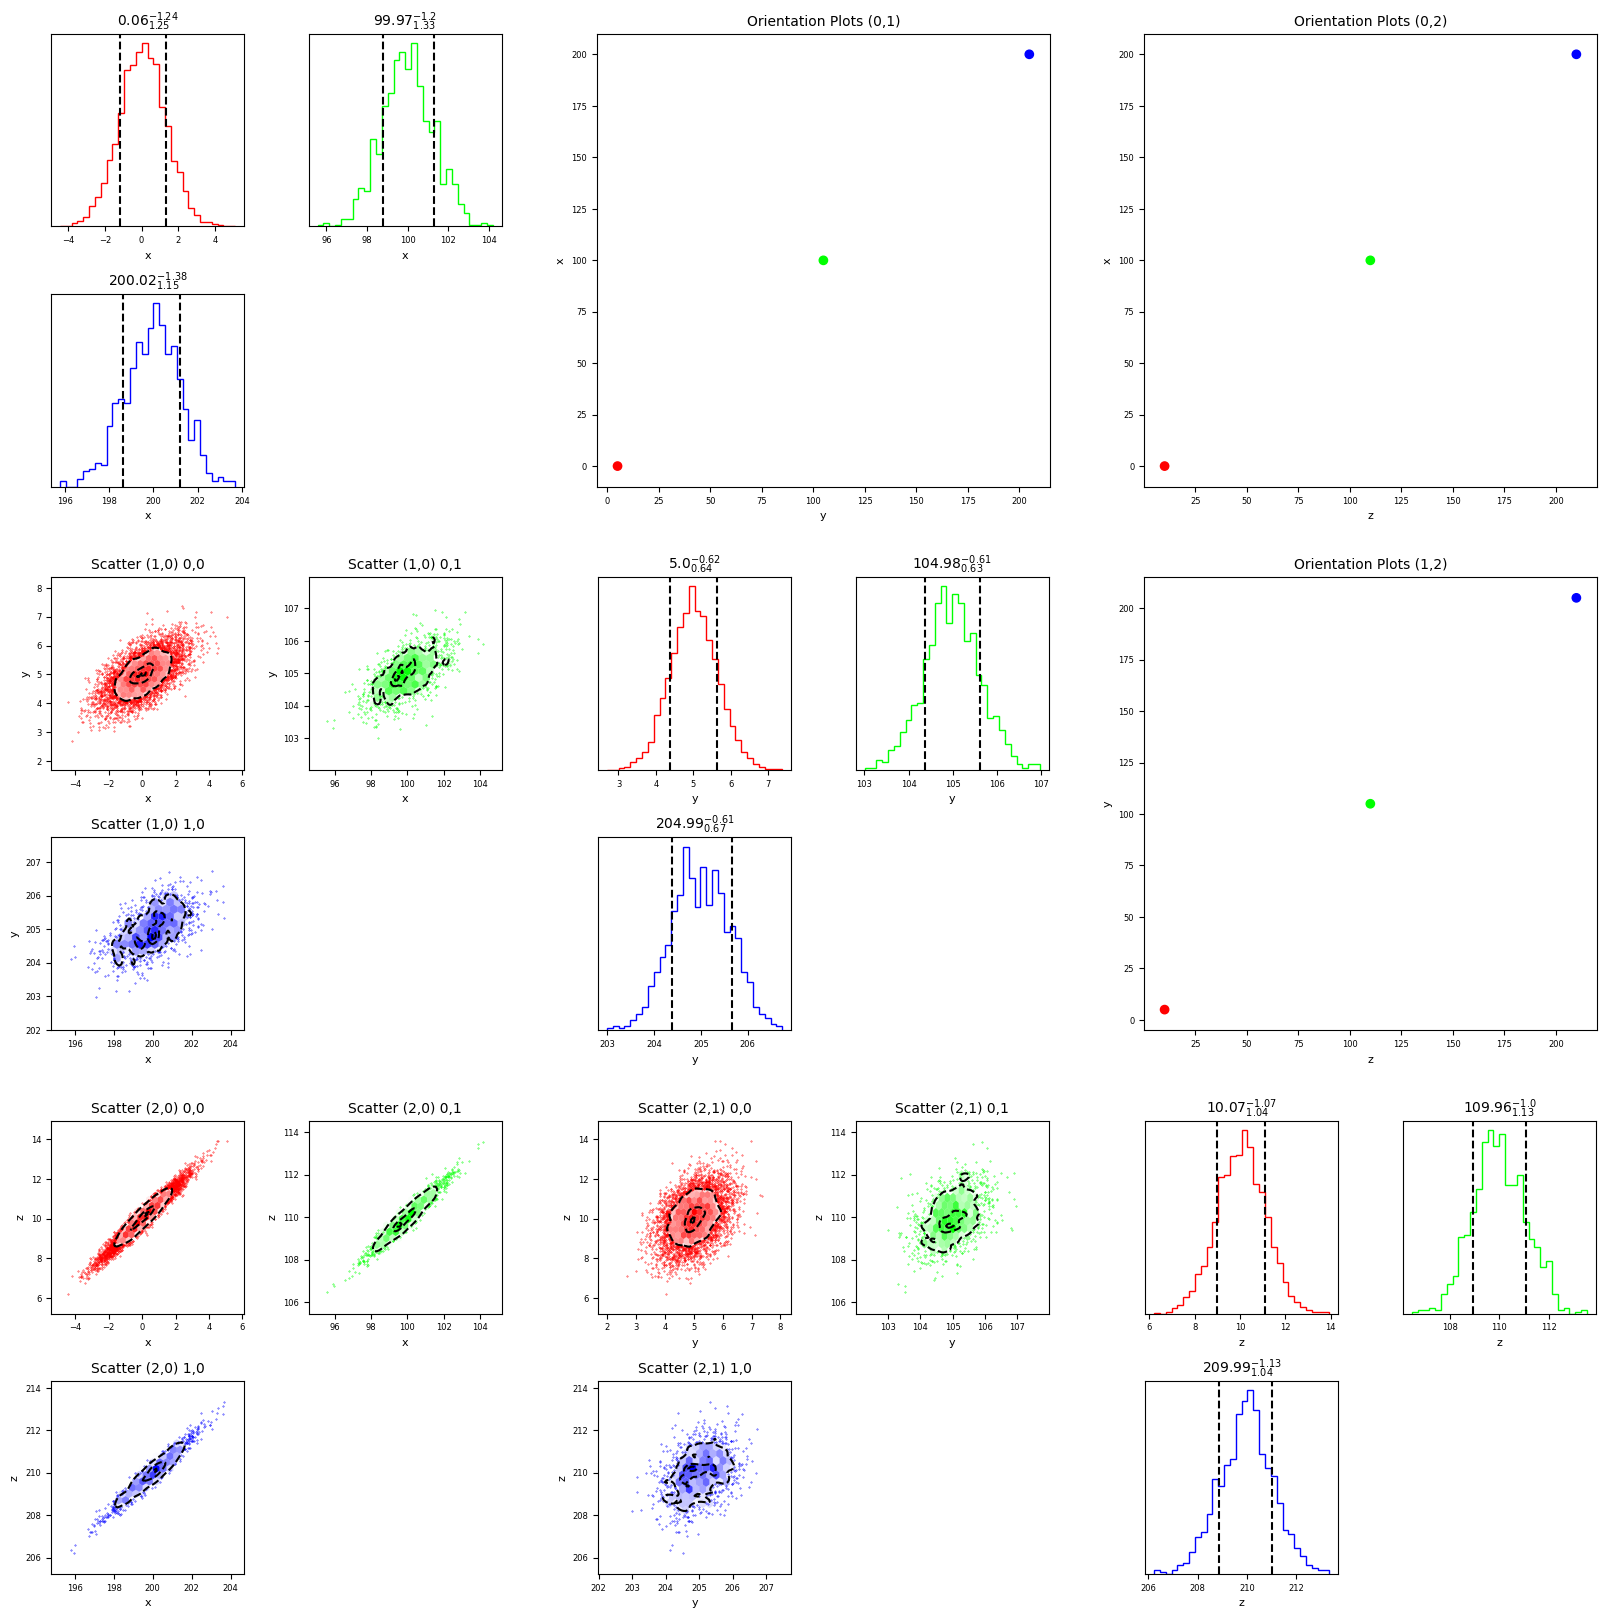

In [10]:
fig = mcorner(data,labels=['x','y','z'],percentiles=True,upper_title=upper_title_func,lower_title=lower_title_func,diag_title='percentile',
                                  figsize=20)